
#Loading of Steinmetz data
includes some visualizations

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA


In [26]:
# @title Figure settings
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [27]:
# @title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [28]:
# @title Data loading
alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat,
                      np.load('steinmetz_part%d.npz'%j,
                              allow_pickle=True)['dat']))
  


In [29]:
fname

['steinmetz_part0.npz', 'steinmetz_part1.npz', 'steinmetz_part2.npz']

In [30]:
alldat.shape

(39,)

In [31]:
alldat[0].keys()

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])

In [32]:
spks_list = []
for this_data in alldat:
  these_spikes = this_data['spks'] #neurons x trials x time
  print(these_spikes.shape) 
  spks_list.append(these_spikes)

spks = np.array(spks_list)

spks.shape

(734, 214, 250)
(1070, 251, 250)
(619, 228, 250)
(1769, 249, 250)
(1077, 254, 250)
(1169, 290, 250)
(584, 252, 250)
(1156, 250, 250)
(788, 372, 250)
(1172, 447, 250)
(857, 342, 250)
(698, 340, 250)
(983, 300, 250)
(756, 268, 250)
(743, 404, 250)
(474, 280, 250)
(565, 224, 250)
(1089, 316, 250)
(606, 247, 250)
(899, 235, 250)
(578, 124, 250)
(646, 444, 250)
(1268, 151, 250)
(1337, 187, 250)
(885, 261, 250)
(1056, 178, 250)
(563, 253, 250)
(549, 142, 250)
(750, 128, 250)
(942, 143, 250)
(977, 237, 250)
(522, 260, 250)
(613, 191, 250)
(781, 296, 250)
(795, 311, 250)
(680, 258, 250)
(1055, 181, 250)
(805, 199, 250)
(1348, 343, 250)


<ipython-input-32-fdfbdf683d2c>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spks = np.array(spks_list)


(39,)

In [33]:
#ab = delayed_period(alldat, 0)

In [34]:
#  def delay(session):
#   '''
#   Returns the delay period for each trial given a session dictionary
#   Input:
#     session: dict
#   Output:
#     delay period: list [trials]
#   '''


# delay(alldat[0])

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the fields below. For extra variables, check out the extra notebook and extra data files (lfp, waveforms and exact spike times, non-binned). 

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['ccf']`: Allen Institute brain atlas coordinates for each neuron. 
* `dat['ccf_axes']`: axes names for the Allen CCF. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_time']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: turning speed of the wheel that the mice uses to make a response, sampled at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position.
* `dat['face']`: average face motion energy from a video camera. 
* `dat['licks']`: lick detections, 0 or 1.   
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 
* `dat['prev_reward']`: time of the feedback (reward/white noise) on the previous trial in relation to the current stimulus time. 
* `dat['reaction_time']`: ntrials by 2. First column: reaction time computed from the wheel movement as the first sample above `5` ticks/10ms bin. Second column: direction of the wheel movement (`0` = no move detected).  


The original dataset is here: https://figshare.com/articles/dataset/Dataset_from_Steinmetz_et_al_2019/9598406

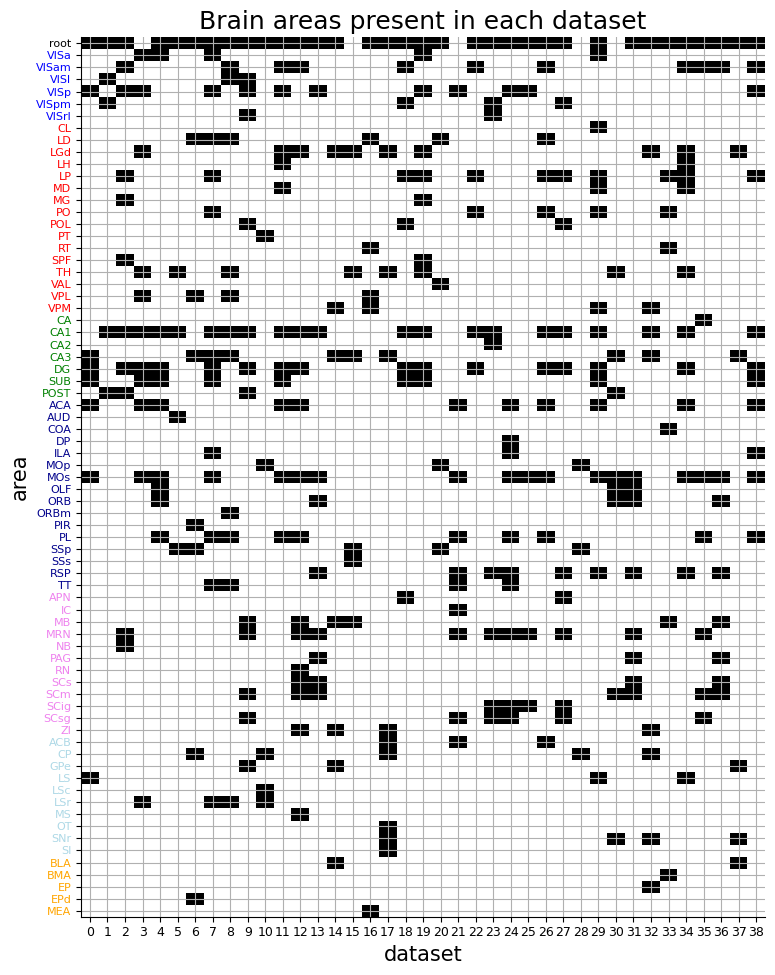

In [35]:
# Make a plot of which brain areas are present in each dataset
# note that region 4 ("other ctx" are neurons that were not able to be classified)
# region 4 does not correspond to brain_group 4, which are all cortical neurons outside of visual cortex
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
region_colors = ['blue', 'red', 'green', 'darkblue', 'violet', 'lightblue', 'orange', 'gray']
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"],  # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"],  # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP","TT"],  # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"],  # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"],  # basal ganglia
                ["BLA", "BMA", "EP", "EPd", "MEA"]  # cortical subplate
                ]

# Assign each area an index
area_to_index = dict(root=0)
counter = 1
for group in brain_groups:
    for area in group:
        area_to_index[area] = counter
        counter += 1

 # Figure out which areas are in each dataset
areas_by_dataset = np.zeros((counter, len(alldat)), dtype=bool)
for j, d in enumerate(alldat):
    for area in np.unique(d['brain_area']):
        i = area_to_index[area]
        areas_by_dataset[i, j] = True

# Show the binary matrix
plt.figure(figsize=(8, 10))
plt.imshow(areas_by_dataset, cmap="Greys", aspect="auto", interpolation="none")

# Label the axes
plt.xlabel("dataset")
plt.ylabel("area")

# Add tick labels
yticklabels = ["root"]
for group in brain_groups:
  yticklabels.extend(group)
plt.yticks(np.arange(counter), yticklabels, fontsize=8)
plt.xticks(np.arange(len(alldat)), fontsize=9)

# Color the tick labels by region
ytickobjs = plt.gca().get_yticklabels()
ytickobjs[0].set_color("black")
counter = 1
for group, color in zip(brain_groups, region_colors):
  for area in group:
    ytickobjs[counter].set_color(color)
    counter += 1

plt.title("Brain areas present in each dataset")
plt.grid(True)
plt.show()

dict_keys(['spks', 'wheel', 'pupil', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'pupil_passive', 'wheel_passive', 'prev_reward', 'ccf', 'ccf_axes', 'cellid_orig', 'reaction_time', 'face', 'face_passive', 'licks', 'licks_passive'])


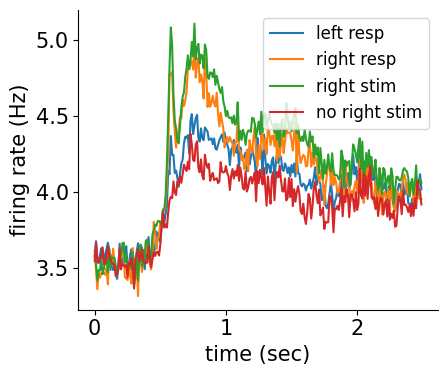

In [36]:
# @title Basic plots of population average

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx.
dat = alldat[11]
print(dat.keys())

dt = dat['bin_size']  # binning at 10 ms
NT = dat['spks'].shape[-1]

ax = plt.subplot(1, 5, 1)
response = dat['response']  # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right']  # 0 - low - high
vis_left = dat['contrast_left']  # 0 - low - high
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:, response >= 0].mean(axis=(0, 1)))  # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:, response < 0].mean(axis=(0, 1)))  # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:, vis_right > 0].mean(axis=(0, 1)))  # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:, vis_right == 0].mean(axis=(0, 1)))  # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
ax.set(xlabel='time (sec)', ylabel='firing rate (Hz)')
plt.show()

In [37]:
nareas = 4  # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area'])  # number of neurons
barea = nareas * np.ones(NN, )  # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j  # assign a number to each region

#MLP

In [38]:
def squared_error(prediction, target, derivative=False):
    if derivative:
        return -2*(target - prediction)
    return np.square(target - prediction)

def heaviside_2(x, theta=0, derivative=False):
    if derivative:
        return np.ones_like(x)
    return np.where(x >= theta, 1, 0)

In [39]:
class MLP:
    def __init__(self, input_size, hidden_size, activation_function, loss_function, **kwargs):
        self.weights_h           = np.random.randn(hidden_size, input_size)
        self.weights_o           = np.random.randn(1, hidden_size)
        self.bias_h              = np.ones((hidden_size, 1))
        self.bias_o              = 0.0
        self.activation_function = activation_function
        self.threshold           = kwargs.get("threshold", 0)
        self.loss_function       = loss_function

    def forward(self, weights, bias, layer_input):
        pre_activation = weights @ layer_input + bias
        if self.activation_function == heaviside_2:
            layer_output = self.activation_function(pre_activation, theta=self.threshold)
        else:
            layer_output = self.activation_function(pre_activation)
            
        return pre_activation, layer_output

    def train(self, inputs, targets, learning_rate, num_epochs):
        self.loss = []
        for epoch in range(num_epochs):
            # loop over all training examples
            error = 0
            for i in range(len(inputs)):
                x_ = inputs[i].reshape(-1, 1)
                # forward pass
                z_h, a_h = self.forward(self.weights_h, self.bias_h, x_)
                z_o, a_o = self.forward(self.weights_o, self.bias_o, a_h)

                # compute the error signal
                error += self.loss_function(prediction=a_o, target=targets[i]).item()

                # compute the gradient of the loss
                grad_loss = self.loss_function(prediction=a_o, target=targets[i], derivative=True)

                # compute gradient of activation function
                if self.activation_function == heaviside_2:
                    grad_act_function = self.activation_function(a_o, theta=self.threshold, derivative=True)
                else: 
                    grad_act_function = self.activation_function(a_o, derivative=True)

                # derivative of z_o
                dz_o = grad_loss * grad_act_function
                # update the weights and bias
                #print(a_h.T.shape)
                self.weights_o -= learning_rate * dz_o @ a_h.T
                self.bias_o -= learning_rate * dz_o
                
                if self.activation_function == heaviside_2:
                    dz_h = self.weights_o.T @ dz_o * self.activation_function(z_h, theta=self.threshold, derivative=True)
                else:
                    dz_h = self.weights_o.T @ dz_o * self.activation_function(z_h, derivative=True)
                # update the weights and bias
                self.weights_h -= learning_rate * dz_h @ x_.T
                self.bias_h -= learning_rate * dz_h

            self.loss.append(error/len(inputs))  # average loss w.r.t number of samples
  
    def evaluate(self, inputs):
        predictions = []
        for i in range(len(inputs)):
            x_ = inputs[i].reshape(-1, 1)
            z_h, a_h = self.forward(self.weights_h, self.bias_h, x_)
            z_o, a_o = self.forward(self.weights_o, self.bias_o, a_h)
            predictions.append(a_o.item())
        return np.array(predictions)

In [53]:
def delayed_period_trial(alldat, session_index, choice_val):
    """
    Calculate the delayed period for the left response in session 2, trial number 1 of session 2 in the dataset.

    Parameters:
        data (dict): The dataset.

    Returns:
        delayed_period (float): The delayed period for the specified trial.
    """
    session_index = 1 # Session 2
    choice_val = -1 # Left response
    
    # Get the response times and go cues for the specified trial
    response_time = alldat[session_index]['response_time'][0] # Trial 1
    go_cue = alldat[session_index]['gocue'][0] # Trial 1
    left_choice = alldat[session_index]['response'][0] == choice_val # Trial 1, Left response
    
    # Calculate the delayed period for the specified trial
    delayed_period = response_time - go_cue if left_choice else None
    
    return delayed_period

In [41]:
# def delayed_period(data, session_index=1, choice_val=-1):
#     """
#     Calculate the delayed period for the left response in a session of the  dataset.

#     Parameters:
#         data (dict): The dataset.
#         session_index (int): The index of the session for which to calculate the delayed period.

#     Returns:
#         delayed_period (numpy.ndarray): An array containing the delayed period for each trial in the session.
#     """
#     if choice_val not in [-1, 0, 1]:
#       print("Not valid choice, must be one of [-1, 0, 1]")
#       return 
#     # Get the response times and go cues for the session
#     response_times = data[session_index]['response_time']
#     go_cues = data[session_index]['gocue']
#     left_choices = data[session_index]['response'] ==  choice_val
    
#     # Calculate the delayed period for each trial
#     delayed_period = response_times[left_choices] - go_cues[left_choices]
    
#     return delayed_period
   
#    # Calculate the delayed period for the left response in session 2, trial number 1 of session 2
#     #delayed_period(data=trials, session_index=1, choice_val=-1)[0]

   

In [54]:
def average_brain_activity(alldat, session_index, choice_val):
    """
    Compute the average brain activity for the left response in session 2, trial number 1 of session 2 in the Steinmetz dataset.

    Parameters:
        data (dict): The Steinmetz dataset.
        session_index (int): The index of the session for which to compute the average brain activity.
        choice_val (int): The choice value for the response (-1, 0, or 1).

    Returns:
        average_activity (numpy.ndarray): An array containing the average brain activity for the left response in session 2, trial number 1 of session 2.
    """
    if choice_val not in [-1, 0, 1]:
        print("Not valid choice, must be one of [-1, 0, 1]")
        return 
    session_index = 1 # Session 2

    # Get the spike times and left choices for the session
    spike_times = alldat[session_index]['spks']
    choices = alldat[session_index]['response'] == choice_val
    trial_idx = 0
    # Extract the brain activity for the left response in session 2, trial number 1 of session 2
    brain_activity = spike_times[:, (alldat[session_index]['spks'][trial_idx]) & choices & (alldat[session_index]['response'] == -1)]
    
    # Compute the average brain activity
    average_activity = np.mean(brain_activity, axis=1)
    
    return average_activity

In [43]:
#alldat[1]["spks"][3].shape

In [44]:
# def average_brain_activity(data, session_index, choice_val):
#     """
#     Compute the average brain activity for the left response in a session of the Steinmetz dataset.

#     Parameters:
#         data (dict): The Steinmetz dataset.
#         session_index (int): The index of the session for which to compute the average brain activity.

#     Returns:
#         average_activity (numpy.ndarray): An array containing the average brain activity for the left response in the session.
#     """
#     if choice_val not in [-1, 0, 1]:
#       print("Not valid choice, must be one of [-1, 0, 1]")
#       return 

#     # Get the spike times and left choices for the session
#     spike_times = data[session_index]['spks']
#     choices = data[session_index]['response'] == choice_val
    
#     # Extract the brain activity for the left response
#     brain_activity = spike_times[:, choices]
    
#     # Compute the average brain activity
#     average_activity = np.mean(brain_activity, axis=1)
    
#     return average_activity

In [52]:
# extract delayed period and average brain activity for left choices in a session of the Steinmetz dataset
session_index = 0 # replace with the index of the session you want to analyze
choice_value = -1
delay_period_session2 = delayed_period_trial(alldat, session_index, choice_value)
brain_activity = average_brain_activity(alldat, session_index,choice_val=choice_value)

# define target labels based on stimulus location
stimulus_location = alldat[session_index]['contrast_left'] > alldat[session_index]['contrast_right']
target_labels = stimulus_location.astype(int)

ValueError: ignored

In [55]:


# set up data and labels
input_data = np.concatenate([delay_period.T, brain_activity.T], axis=1)

# set parameters for model
input_size       = input_data.shape[1]
num_hidden       = 6
activation_fn    = heaviside_2
threshold        = 0
loss_fn          = squared_error
learning_rate    = 0.01
num_train_epochs = 30000

# initialize a new MLP model and see what it thinks at first
model = MLP(input_size, num_hidden, activation_fn, loss_fn, threshold=threshold)
print(f"Predictions with new initialization: {model.evaluate(input_data, target_labels)}")

# train the model
model.train(input_data, target_labels, learning_rate=learning_rate, num_epochs=num_train_epochs)

# see what it predicts after training 
print(f"Predictions after training {model.evaluate(input_data, target_labels)}")


NameError: ignored

In [48]:
# # Call the delayed_period_trial function with the appropriate arguments
# delayed_period_session2 = delayed_period_trial(alldat, 1, 1)

# # Call the average_brain_activity function with the appropriate arguments
# average_activity_session2 = average_brain_activity(alldat, 1, 1)


In [ ]:

# Print the shapes of the arrays
example_ = average_brain_activity(alldat, 1, 1)
print(delayed_period_trial(alldat, 1, 1).shape)
print(example_)
plt.imshow(example_[200:400, :], cmap="RdBu")